In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



In [2]:
df=pd.read_csv("preprocessed_data.csv")
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.200000,0.000000,0.000000,1,1,0.506735,1
1,0.481799,0.522727,0.100000,0.334031,0.000000,0,1,0.562709,0
2,0.254818,0.545455,0.800000,0.636357,0.800000,1,0,0.569654,1
3,0.676660,0.477273,0.100000,0.000000,0.400000,0,0,0.469120,0
4,1.000000,0.568182,0.200000,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...
15921,0.796021,0.635139,0.294613,0.444239,0.800000,1,0,0.800099,1
15922,0.141680,0.920881,0.690375,0.499893,0.000000,1,0,0.252670,1
15923,0.573911,0.332799,0.258921,0.482150,0.000000,0,1,0.826455,1
15924,0.611469,0.556419,0.162646,0.000000,0.874707,1,0,0.375351,1


In [3]:
x=df.drop(columns='churn')
y=df['churn']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [5]:
y_train

13555    1
1665     0
14878    1
7471     0
2582     0
        ..
13418    1
5390     1
860      1
15795    1
7270     0
Name: churn, Length: 12740, dtype: int64

In [6]:
classifier = RandomForestClassifier(random_state=42)

In [7]:
# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [8]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [9]:
# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [11]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [12]:
print("\nBest Score : ",grid_search.best_score_)


Best Score :  0.8809262166405023


In [13]:
# Use the best model from GridSearchCV
best_classifier = grid_search.best_estimator_

In [14]:
# Create predictions
y_pred = best_classifier.predict(x_test)

In [15]:
# Calculate then print the testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy * 100)

Testing accuracy: 89.67357187696172


In [16]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1441  192]
 [ 137 1416]]


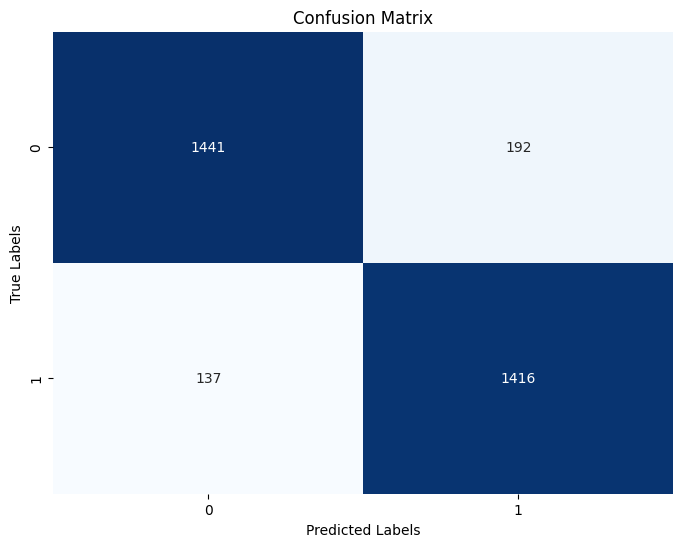

In [17]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print("\n\n\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1633
           1       0.88      0.91      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [23]:
# Fit the best model from GridSearchCV to the training data
best_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [24]:
# Selecting one of the decision trees from the random forest
decision_tree = best_classifier.estimators_[0]

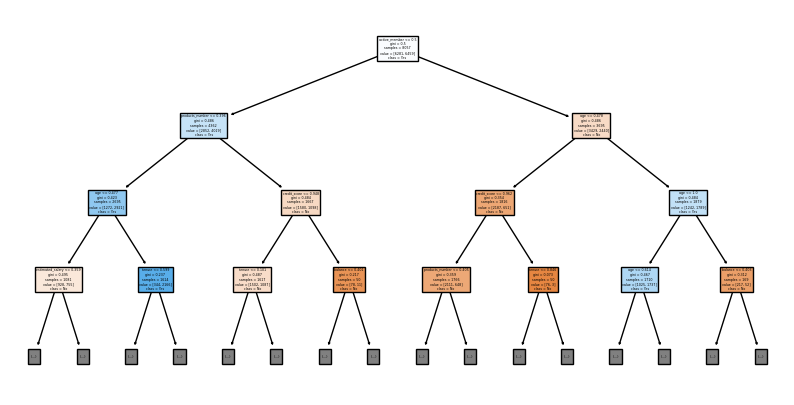

In [25]:
# Plot decision tree
plt.figure(figsize=(10, 5))
plot_tree(decision_tree, feature_names=x_train.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.show()